<a href="https://colab.research.google.com/github/SowmyaLR/Statistics-for-ML/blob/pandemic-visualization/india/gujarat/gujarat_covid_19_cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


read_html reads html tables into list of dataframe objects

In [0]:
url = 'https://www.mohfw.gov.in/'
state_wise_df = pd.read_html(url)
state_wise_df = state_wise_df[0][:33]

In [3]:
state_wise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   S. No.                     33 non-null     object
 1   Name of State / UT         33 non-null     object
 2   Total Confirmed cases*     33 non-null     object
 3   Cured/Discharged/Migrated  33 non-null     object
 4   Deaths**                   33 non-null     object
dtypes: object(5)
memory usage: 1.4+ KB


Need to convert columns "Total Confirmed cases*" , "Cured/Discharged/Migrated", "Deaths**" to int dtype for further computation

In [0]:
state_wise_df['Total Confirmed cases*'] = pd.to_numeric(state_wise_df['Total Confirmed cases*'])
state_wise_df['Cured/Discharged/Migrated'] = pd.to_numeric(state_wise_df['Cured/Discharged/Migrated'])
state_wise_df['Deaths**'] = pd.to_numeric(state_wise_df['Deaths**'])

In [5]:
state_wise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   S. No.                     33 non-null     object
 1   Name of State / UT         33 non-null     object
 2   Total Confirmed cases*     33 non-null     int64 
 3   Cured/Discharged/Migrated  33 non-null     int64 
 4   Deaths**                   33 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.4+ KB


In [6]:
state_wise_df.sort_values(by='Total Confirmed cases*', ascending=False, inplace=True)
state_wise_df.head()

,S. No.,Name of State / UT,Total Confirmed cases*,Cured/Discharged/Migrated,Deaths**
19,20,Maharashtra,29100,6564,1068
27,28,Tamil Nadu,10108,2599,71
10,11,Gujarat,9931,4035,606
8,9,Delhi,8895,3518,123
26,27,Rajasthan,4727,2677,125


In [7]:
state_wise_df.columns


Index(['S. No.', 'Name of State / UT', 'Total Confirmed cases*',
       'Cured/Discharged/Migrated', 'Deaths**'],
      dtype='object')

[Text(0, 0, 'Maharashtra'),
 Text(0, 0, 'Tamil Nadu'),
 Text(0, 0, 'Gujarat'),
 Text(0, 0, 'Delhi'),
 Text(0, 0, 'Rajasthan'),
 Text(0, 0, 'Madhya Pradesh'),
 Text(0, 0, 'Uttar Pradesh'),
 Text(0, 0, 'West Bengal'),
 Text(0, 0, 'Andhra Pradesh'),
 Text(0, 0, 'Punjab'),
 Text(0, 0, 'Telengana'),
 Text(0, 0, 'Karnataka'),
 Text(0, 0, 'Bihar'),
 Text(0, 0, 'Jammu and Kashmir'),
 Text(0, 0, 'Haryana'),
 Text(0, 0, 'Odisha'),
 Text(0, 0, 'Kerala'),
 Text(0, 0, 'Jharkhand'),
 Text(0, 0, 'Chandigarh'),
 Text(0, 0, 'Tripura'),
 Text(0, 0, 'Assam'),
 Text(0, 0, 'Uttarakhand'),
 Text(0, 0, 'Himachal Pradesh'),
 Text(0, 0, 'Chhattisgarh'),
 Text(0, 0, 'Ladakh'),
 Text(0, 0, 'Andaman and Nicobar Islands'),
 Text(0, 0, 'Goa'),
 Text(0, 0, 'Meghalaya'),
 Text(0, 0, 'Puducherry'),
 Text(0, 0, 'Manipur'),
 Text(0, 0, 'Mizoram'),
 Text(0, 0, 'Dadar Nagar Haveli'),
 Text(0, 0, 'Arunachal Pradesh')]

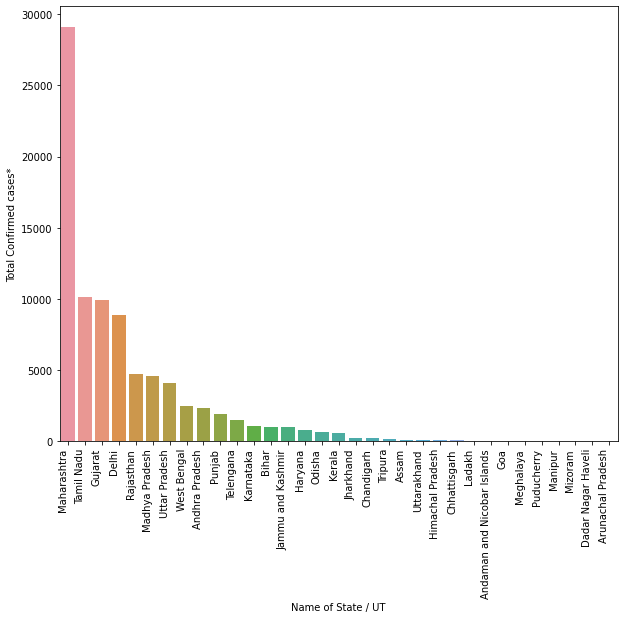

In [8]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x='Name of State / UT', y='Total Confirmed cases*', data=state_wise_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

dataset source: [kaggle](https://www.kaggle.com/pateldeep7799/covid19-cases-in-gujaratindia?select=DistrictWiseReport.csv)

In [9]:
!wget -O 'gujarat_dataset.csv' https://raw.githubusercontent.com/SowmyaLR/Statistics-for-ML/pandemic-visualization/india/gujarat/gujarat_dataset.csv

--2020-05-16 22:07:01--  https://raw.githubusercontent.com/SowmyaLR/Statistics-for-ML/pandemic-visualization/india/gujarat/gujarat_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1121 (1.1K) [text/plain]
Saving to: ‘gujarat_dataset.csv’

gujarat_dataset.csv 100%[===================>]   1.09K  --.-KB/s    in 0s      

2020-05-16 22:07:01 (54.3 MB/s) - ‘gujarat_dataset.csv’ saved [1121/1121]



In [0]:
gujarat_covid_df = pd.read_csv('gujarat_dataset.csv')

In [11]:
gujarat_covid_df.describe()

,Sr No,Confirmed Positive Cases,Cases Tested for COVID19,Patients Recovered,People Under Quarantine,Total Deaths
count,33.00000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,17.00000,290.636364,3779.030303,113.727273,7359.575758,17.757576
std,9.66954,1203.782627,9412.489753,399.442054,10138.993216,80.808427
min,1.00000,1.000000,344.000000,0.000000,19.000000,0.000000
25%,9.00000,8.000000,760.000000,3.000000,1777.000000,0.000000
50%,17.00000,32.000000,1291.000000,14.000000,3903.000000,1.000000
75%,25.00000,73.000000,1731.000000,37.000000,7335.000000,2.000000
max,33.00000,6910.000000,51232.000000,2247.000000,44187.000000,465.000000


In [12]:
gujarat_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sr No                     33 non-null     int64 
 1   District Name             33 non-null     object
 2   Confirmed Positive Cases  33 non-null     int64 
 3   Cases Tested for COVID19  33 non-null     int64 
 4   Patients Recovered        33 non-null     int64 
 5   People Under Quarantine   33 non-null     int64 
 6   Total Deaths              33 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.9+ KB


In [0]:
sorted_gujarat_covid_df = gujarat_covid_df.sort_values(by='Confirmed Positive Cases',ascending=False).nlargest(5,'Confirmed Positive Cases')

Text(0.5, 1.0, 'Top 5 cities in Gujarat having positive cases')

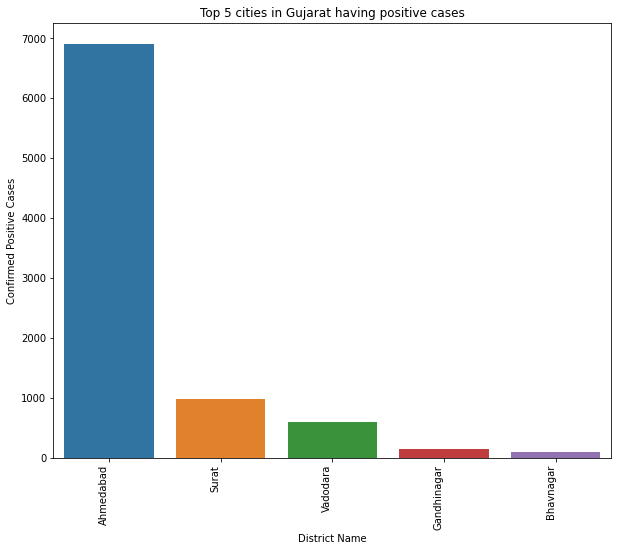

In [14]:
plt.subplots(figsize=(10,8))
ax = sns.barplot(x='District Name', y='Confirmed Positive Cases', data=sorted_gujarat_covid_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title('Top 5 cities in Gujarat having positive cases')

In [0]:
pouplation_url = 'https://en.wikipedia.org/wiki/List_of_cities_in_Gujarat_by_population'
gujarat_population_df = pd.read_html(pouplation_url)
gujarat_population_df = gujarat_population_df[0]

In [16]:
gujarat_population_df.describe()

,S.No.,Population (2021) Expected,Population (2019),Population (2011),Population (2001),Population (1991),Area (2019) (km2)
count,15.000000,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,15.000000
mean,8.000000,1.831908e+06,1.673766e+06,1.178556e+06,8.485485e+05,5.861981e+05,129.110667
std,4.472136,2.980396e+06,2.721841e+06,1.837109e+06,1.246850e+06,8.599641e+05,145.730343
min,1.000000,2.435840e+05,2.371380e+05,2.172030e+05,1.516930e+05,1.045850e+05,27.600000
25%,4.500000,3.372465e+05,3.168285e+05,2.499255e+05,1.970875e+05,1.635685e+05,41.270000
50%,8.000000,3.852910e+05,3.614170e+05,2.880920e+05,2.324110e+05,1.744800e+05,60.360000
75%,11.500000,1.636700e+06,1.400860e+06,9.982610e+05,7.799855e+05,5.298575e+05,156.355000
max,15.000000,1.004614e+07,9.250000e+06,6.357693e+06,4.525013e+06,3.312216e+06,493.290000


In [17]:
gujarat_population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No.                       15 non-null     float64
 1   City Name                   15 non-null     object 
 2   Population (2021) Expected  15 non-null     int64  
 3   Population (2019)           15 non-null     int64  
 4   Population (2011)           15 non-null     int64  
 5   Population (2001)           15 non-null     int64  
 6   Population (1991)           15 non-null     int64  
 7   Area (2019) (km2)           15 non-null     float64
dtypes: float64(2), int64(5), object(1)
memory usage: 1.1+ KB


In [0]:
gujarat_population_df['density_per_km2_2019'] = gujarat_population_df['Population (2019)']/gujarat_population_df['Area (2019) (km2)']

In [19]:
sorted_population_df = gujarat_population_df.sort_values(by='density_per_km2_2019', ascending=False).nlargest(5,'density_per_km2_2019')
sorted_population_df

,S.No.,City Name,Population (2021) Expected,Population (2019),Population (2011),Population (2001),Population (1991),Area (2019) (km2),density_per_km2_2019
0,1.0,Ahmedabad,10046145,9250000,6357693,4525013,3312216,493.29,18751.647104
1,2.0,Surat,7567538,6850000,4591246,2811614,1518950,379.77,18037.233062
8,9.0,Navsari,350674,333777,282791,232411,190946,30.25,11033.950413
4,5.0,Bhavnagar,816845,771719,605882,517708,405225,71.36,10814.447870
12,13.0,Surendranagar,298692,287093,253606,219585,166466,27.60,10401.920290


Text(0.5, 1.0, "Gujarat's population density per km2 as of 2019")

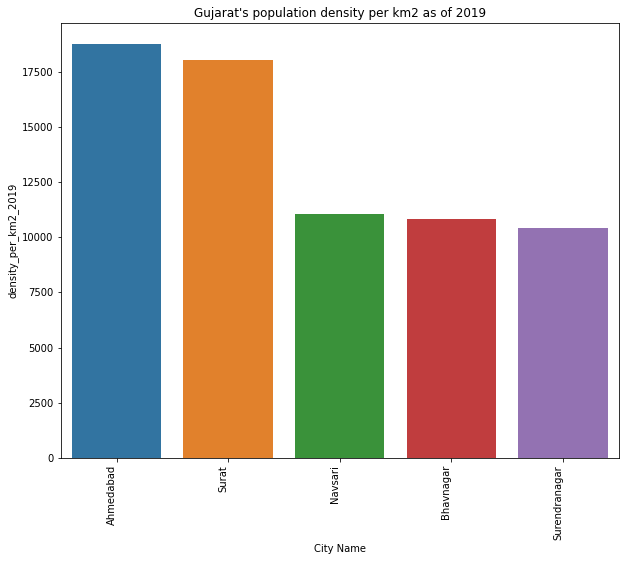

In [21]:
plt.subplots(figsize=(10,8))
ax1 = sns.barplot(x='City Name', y='density_per_km2_2019', data=sorted_population_df)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")
ax1.set_title("Gujarat's population density per km2 as of 2019")